<a href="https://colab.research.google.com/github/icemduru/forest_cover_type_prediction_via_neural_networks/blob/main/CoverType_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Try to predict forest cover types

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [ ]:
df = pd.read_csv("/content/cover_data.csv")

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,...,24378.000000,24378.000000,24378.000000,24378.000000,24378.00000,24378.000000,24378.000000,24378.000000,24378.000000,24378.000000
mean,2757.859305,146.654744,14.864761,203.261167,41.067353,2293.224496,214.418967,220.325116,135.851553,2972.731326,...,0.028304,0.025269,0.000902,0.004184,0.00041,0.001395,0.029863,0.026951,0.018828,3.205103
std,340.850358,110.776747,8.370377,184.720414,53.025538,1705.328535,28.147627,20.513289,39.955066,2189.713225,...,0.165844,0.156943,0.030028,0.064550,0.02025,0.037320,0.170213,0.161942,0.135922,1.913441
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2554.000000,57.000000,8.000000,67.000000,4.000000,957.000000,200.000000,211.000000,115.000000,1019.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2762.000000,115.000000,13.000000,162.000000,23.000000,1747.000000,221.000000,224.000000,138.000000,2227.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2961.000000,232.000000,20.000000,295.000000,62.000000,3379.000000,234.000000,234.000000,160.000000,5238.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
print(df.columns)


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


it is better to now have any nan for class.

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=23,shuffle=True,stratify=y)

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model = keras.Sequential()
input_dimention= len(x.columns)
model.add(layers.Dense(128, activation='relu',input_dim=input_dimention))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(112, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8,activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 112)               14448     
                                                                 
 dropout_1 (Dropout)         (None, 112)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                7232      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
Total params: 29,240
Trainable params: 29,240
Non-traina

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(X_train,y_train,epochs=185,batch_size=228,callbacks=[es],validation_data=(X_test, y_test))

Epoch 1/185
81/81 [==============================] - 2s 16ms/step - loss: 0.8780 - accuracy: 0.6530 - val_loss: 0.6526 - val_accuracy: 0.7253
Epoch 2/185
81/81 [==============================] - 1s 10ms/step - loss: 0.6447 - accuracy: 0.7339 - val_loss: 0.5930 - val_accuracy: 0.7511
Epoch 3/185
81/81 [==============================] - 1s 11ms/step - loss: 0.5883 - accuracy: 0.7558 - val_loss: 0.5447 - val_accuracy: 0.7710
Epoch 4/185
81/81 [==============================] - 1s 11ms/step - loss: 0.5601 - accuracy: 0.7662 - val_loss: 0.5207 - val_accuracy: 0.7792
Epoch 5/185
81/81 [==============================] - 1s 11ms/step - loss: 0.5370 - accuracy: 0.7754 - val_loss: 0.5104 - val_accuracy: 0.7842
Epoch 6/185
81/81 [==============================] - 1s 12ms/step - loss: 0.5228 - accuracy: 0.7850 - val_loss: 0.5113 - val_accuracy: 0.7801
Epoch 7/185
81/81 [==============================] - 1s 11ms/step - loss: 0.5109 - accuracy: 0.7855 - val_loss: 0.4884 - val_accuracy: 0.7925
Epoch 

[]

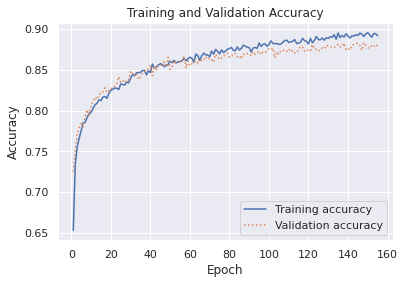

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

[]

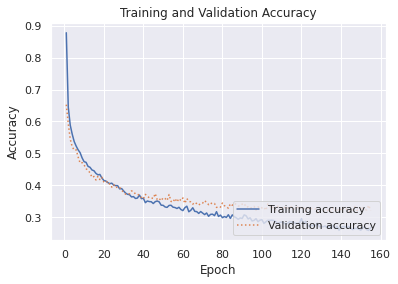

In [ ]:
sns.set()
 
acc = history.history['loss']
val = history.history['val_loss']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

### evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print()
print("loss:{}".format(loss))
print("accuracy:{}".format(acc))

191/191 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8814

loss:0.3204805552959442
accuracy:0.881378173828125


In [ ]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                'Ponderosa Pine', 'Cottonwood/Willow',
                'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.81      0.81      0.81       933
   Lodgepole Pine       0.93      0.90      0.91      2403
   Ponderosa Pine       0.78      0.78      0.78       540
Cottonwood/Willow       0.94      0.96      0.95       540
            Aspen       0.87      0.90      0.89       599
      Douglas-fir       0.81      0.84      0.82       540
        Krummholz       0.94      0.97      0.96       540

         accuracy                           0.88      6095
        macro avg       0.87      0.88      0.87      6095
     weighted avg       0.88      0.88      0.88      6095



Text(89.18, 0.5, 'Actual label')

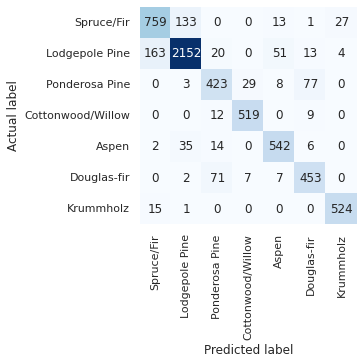

In [ ]:
mat = confusion_matrix(y_test, y_pred)
labels = class_names
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Pretty well accuracy ! There is sometimes mixture between spruce and L. pine